In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
dataset = pd.read_csv(r'C:\Users\Tanmay\Documents\SOM\Credit_Card_Applications.csv')

In [7]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [15]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

Training the SOM

In [21]:
!pip install minisom


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11718 sha256=b7c03fb7fc4f78b0b3dab08944e64a36f82672304798525998517f46d78487bd
  Stored in directory: c:\users\tanmay\appdata\local\pip\cache\wheels\c8\29\ba\ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


In [23]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

Visualizing the results

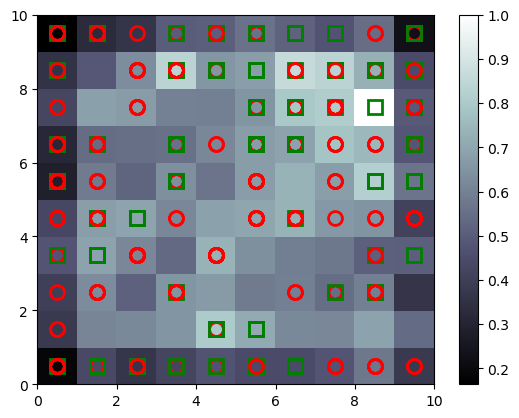

In [25]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

Finding the frauds

In [45]:
# Convert lists to NumPy arrays
fraud_1 = np.array(mappings.get((8,1), []))  # Use .get() to handle missing keys
fraud_2 = np.array(mappings.get((6,9), []))

# If any array is 1D, convert it to 2D
if fraud_1.ndim == 1:
    fraud_1 = np.expand_dims(fraud_1, axis=0)
if fraud_2.ndim == 1:
    fraud_2 = np.expand_dims(fraud_2, axis=0)

# Check if either array is empty before concatenation
if fraud_1.size == 0 and fraud_2.size == 0:
    print("Both nodes have no data points.")
elif fraud_1.size == 0:
    frauds = fraud_2
elif fraud_2.size == 0:
    frauds = fraud_1
else:
    # Concatenate arrays along axis 0
    frauds = np.concatenate((fraud_1, fraud_2), axis=0)

# Inverse transform if needed
frauds = sc.inverse_transform(frauds)
print(frauds)


[[1.5690372e+07 1.0000000e+00 2.1000000e+01 3.0000000e+00 1.0000000e+00
  2.0000000e+00 4.0000000e+00 1.0850000e+00 1.0000000e+00 1.0000000e+00
  8.0000000e+00 1.0000000e+00 2.0000000e+00 1.6000000e+02 2.0000000e+00]
 [1.5780088e+07 1.0000000e+00 3.4500000e+01 4.0400000e+00 1.0000000e+00
  3.0000000e+00 5.0000000e+00 8.5000000e+00 1.0000000e+00 1.0000000e+00
  7.0000000e+00 1.0000000e+00 2.0000000e+00 1.9500000e+02 1.0000000e+00]
 [1.5750476e+07 1.0000000e+00 3.6670000e+01 4.4150000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 2.5000000e-01 1.0000000e+00 1.0000000e+00
  1.0000000e+01 1.0000000e+00 2.0000000e+00 3.2000000e+02 1.0000000e+00]]
